In [3]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy.ma as ma

# Load files

In [4]:
gridfile = xr.open_dataset('edited_grid_coordinates_pop_tx0.1_38ma.nc')
topo = xr.open_dataset('/nethome/5867800/grid/adapted_bathymetry.nc')

# Prepare file

Select only regions of at max 500 metres water depth.

In [5]:
reg = np.where(topo['Bathymetry']<-500., 0, 1)
topo['Region'] = (('j_index', 'i_index'), reg)

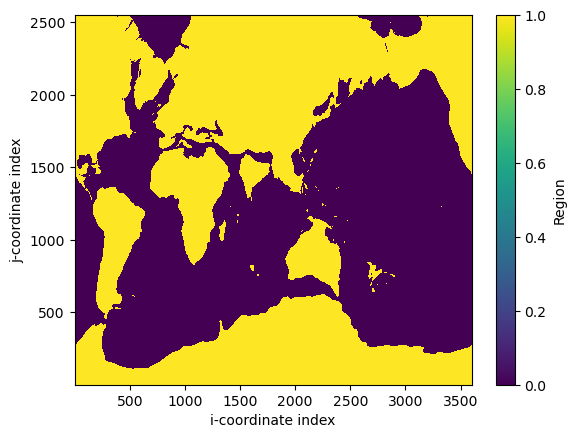

In [6]:
topo['Region'].plot();

Select region east of 74°W.

In [7]:
topo['Region'] = topo['Region'].where(topo['U_LON_2D']>-74., other=0)

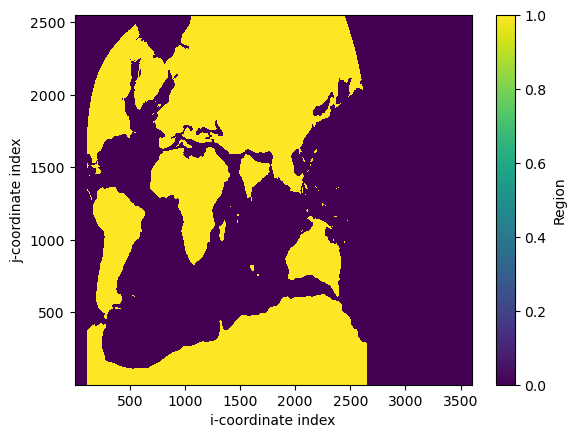

In [8]:
topo['Region'].plot();

Of these, select only those west of 62°E.

In [9]:
topo['Region'] = topo['Region'].where(topo['U_LON_2D']<62., other=0)

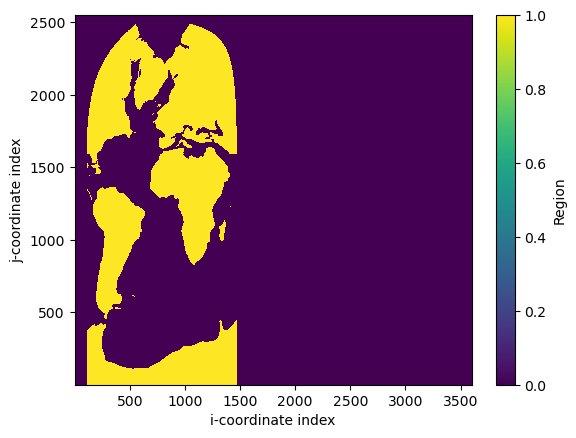

In [10]:
topo['Region'].plot();

Of these, select only those south of 66°S.

In [11]:
topo['Region'] = topo['Region'].where(topo['U_LAT_2D']<-66., other=0)

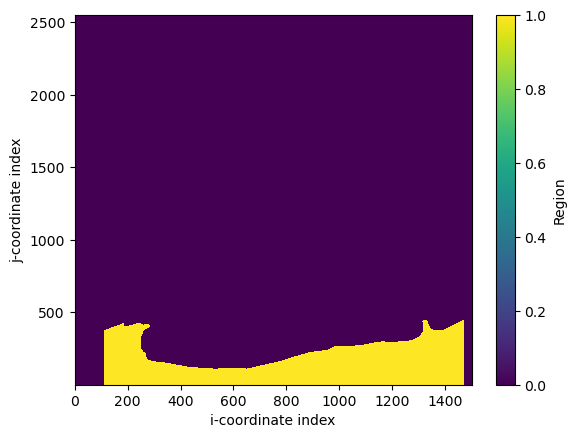

In [12]:
topo['Region'].plot(xlim=(0,1500));

Of these, select only the marine regions (below 0 metres).

In [13]:
topo['Region'] = topo['Region'].where(topo['Bathymetry']<=0., other=0)

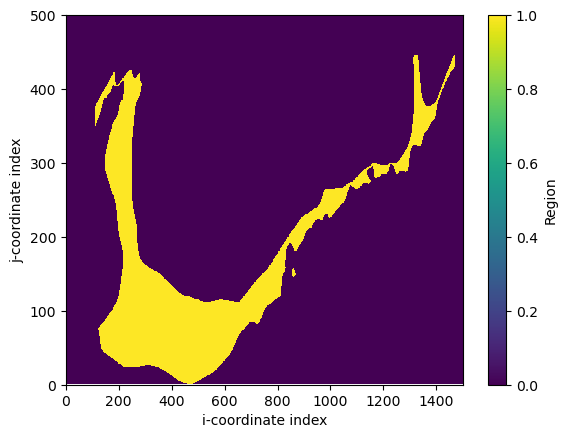

In [14]:
topo['Region'].plot(xlim=(0,1500), ylim=(0,500));

Remove region northwest of the Antarctic Peninsula

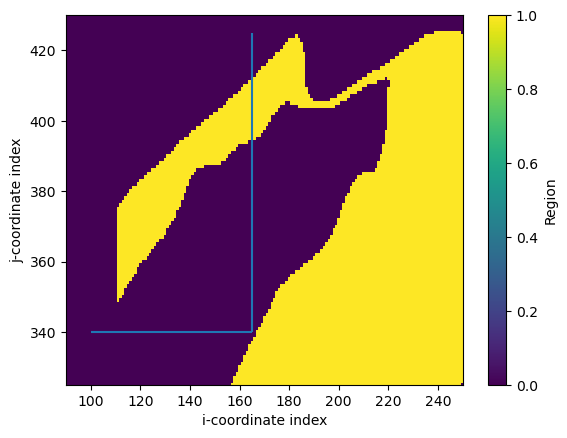

In [15]:
topo['Region'].plot(xlim=(90,250), ylim=(325,430))
plt.hlines(340,100,165)
plt.vlines(165,340,425);

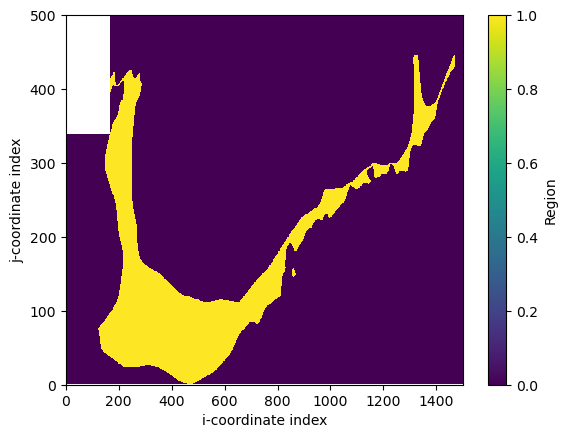

In [16]:
topo['Region'].where((topo['i_index']>165)|(topo['j_index']<340)).plot(xlim=(0,1500), ylim=(0,500));

In [17]:
topo['Region'] = topo['Region'].where((topo['i_index']>165)|(topo['j_index']<340), other=0)

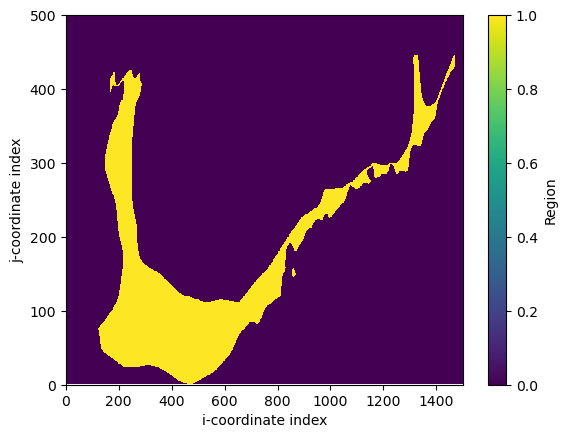

In [18]:
topo['Region'].plot(xlim=(0,1500), ylim=(0,500));

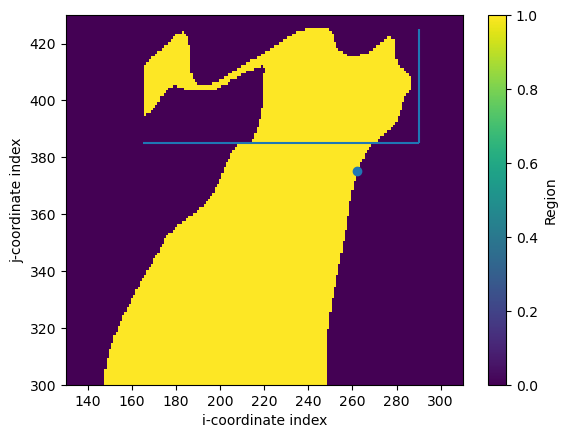

In [19]:
topo['Region'].plot(xlim=(130,310), ylim=(300,430))
plt.scatter(topo['j_index'][261], topo['i_index'][374]) # northernmost release location
plt.hlines(385,165,290)
plt.vlines(290,385,425);

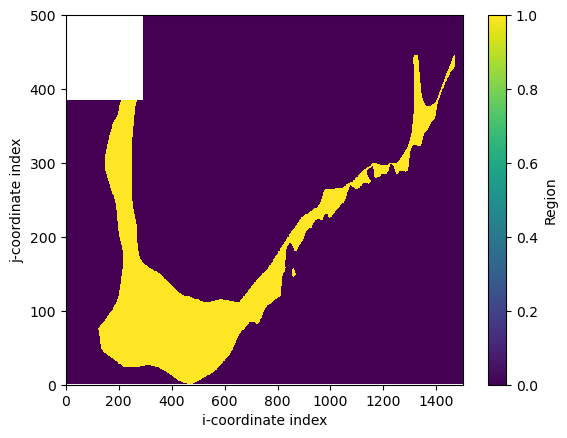

In [20]:
topo['Region'].where((topo['i_index']>290)|(topo['j_index']<385)).plot(xlim=(0,1500), ylim=(0,500));

In [21]:
topo['Region'] = topo['Region'].where((topo['i_index']>290)|(topo['j_index']<385), other=0)

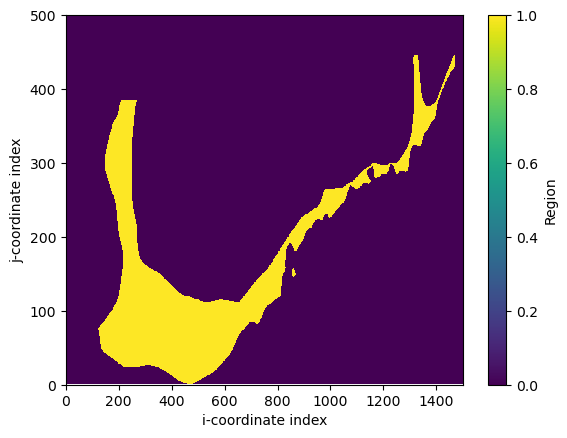

In [22]:
topo['Region'].plot(xlim=(0,1500), ylim=(0,500));

# Select regions Carter et al. (2017)

In [23]:
# Forwards release locations
lonf = np.array([-55., -50., -45., -40., -35., -30., -25., -20.,
                 -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,
                  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,
                 -57.82330253, -59.25, -60.08662877, -60.01036191, -58.82106809])
latf = np.array([-77.99537227, -78.45787684, -79.17977465, -79.75459498, -79.99027112, -80.07689735, -79.9997914 , -80.12097168,
                 -79.24559138, -78.39033646, -77.33178711, -76.13251966, -75.17986379, -74.68456009, -73.6896764 , -73.53134648,
                 -72.9724492 , -72.3117251 , -72.29006817, -72.16268516, -70.86573029, -68.58359528, -68.58359528, -66.59729004,
                 -77.        , -75.        , -73.        , -71.        , -69.        ])

/nethome/5867800/.conda/envs/py3_parcels/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/nethome/5867800/.conda/envs/py3_parcels/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/nethome/5867800/.conda/envs/py3_parcels/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


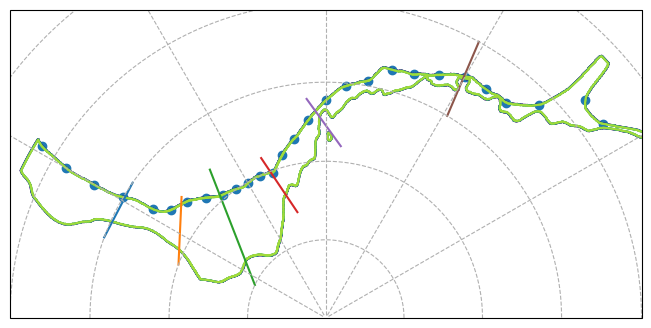

In [24]:
projection=ccrs.SouthPolarStereo()
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(10,4))
ax.set_extent([-90, 90, -85, -70], ccrs.PlateCarree())
ax.gridlines(linestyle='--')
    
ax.scatter(lonf, latf, transform=ccrs.PlateCarree())
ax.contour(topo['U_LON_2D'], topo['U_LAT_2D'], topo['Region'], transform=ccrs.PlateCarree())
ax.plot([-70,-55], [-75,-75], transform=ccrs.PlateCarree()) # 1 - 2
ax.plot([-70,-50], [-80,-78], transform=ccrs.PlateCarree()) # 2 - 3
ax.plot([-65,-38], [-85,-78], transform=ccrs.PlateCarree()) # 3 - 4
ax.plot([-22,-15], [-79,-83], transform=ccrs.PlateCarree()) # 4 - 5
ax.plot([-5,5], [-76,-79], transform=ccrs.PlateCarree()) # 5 - 6a
ax.plot([31,29], [-75,-70], transform=ccrs.PlateCarree()) # 6a - 6b
plt.show()

North Graham Land

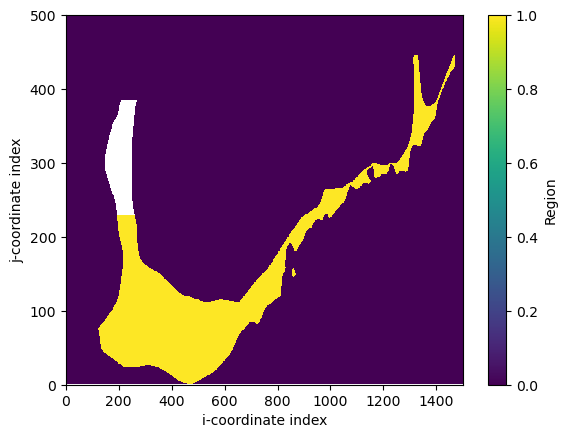

In [25]:
topo['Region'].where((topo['i_index']>400)|(topo['j_index']<230)|(topo['Region']==0)).plot(xlim=(0,1500), ylim=(0,500));

In [26]:
topo['Region'] = topo['Region'].where((topo['i_index']>400)|(topo['j_index']<230)|(topo['Region']==0), other=8)

Palmer Land

In [27]:
ytst = (4*topo['i_index'])/25 + 104

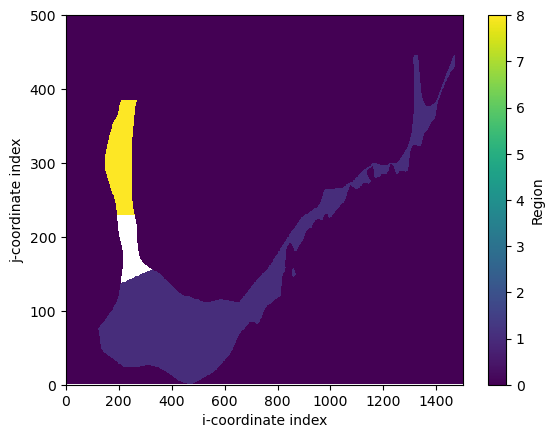

In [28]:
topo['Region'].where((topo['i_index']>400)|(topo['j_index']<ytst)|(topo['Region']==0)|(topo['Region']==8)).plot(xlim=(0,1500), ylim=(0,500));

In [29]:
topo['Region'] = topo['Region'].where((topo['i_index']>400)|(topo['j_index']<ytst)|(topo['Region']==0)|(topo['Region']==8), other=2)

Ellsworth Mountains

In [30]:
ytst = (3*topo['i_index'])/5 - 120

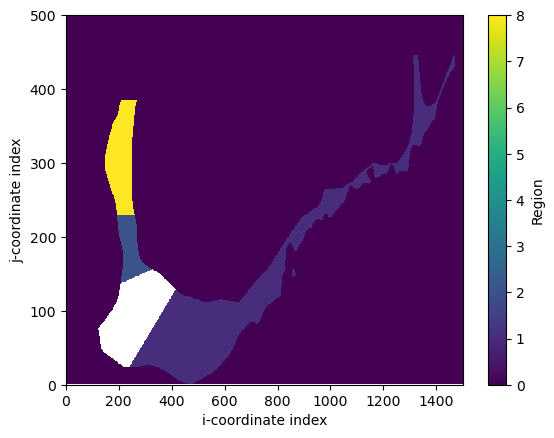

In [31]:
topo['Region'].where((topo['i_index']>500)|(topo['j_index']<ytst)|(topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2)).plot(xlim=(0,1500), ylim=(0,500));

In [32]:
topo['Region'] = topo['Region'].where((topo['i_index']>500)|(topo['j_index']<ytst)|(topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2), other=3)

Filchner Ice Shelf

In [33]:
ytst = (-3*topo['i_index'])/4 + (1125./2)

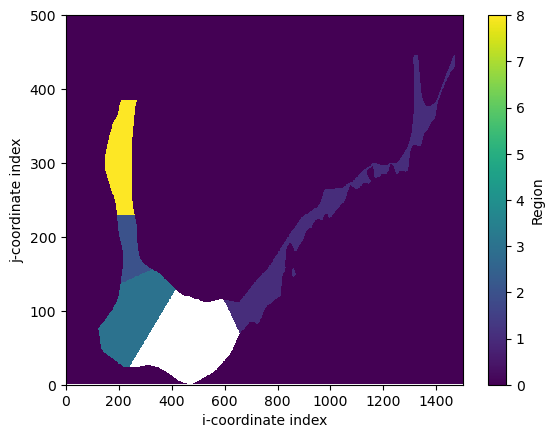

In [34]:
topo['Region'].where((topo['i_index']>750)|(topo['j_index']>ytst)|(topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2)|(topo['Region']==3)).plot(xlim=(0,1500), ylim=(0,500));

In [35]:
topo['Region'] = topo['Region'].where((topo['i_index']>750)|(topo['j_index']>ytst)|(topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2)|(topo['Region']==3), other=4)

Coats Land

In [36]:
ytst = (-topo['i_index'])/2 + 600

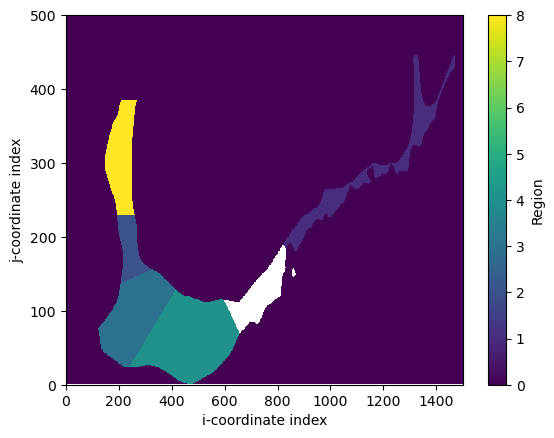

In [37]:
topo['Region'].where((topo['i_index']>950)|(topo['j_index']>ytst)|(topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2)|(topo['Region']==3)|(topo['Region']==4)).plot(xlim=(0,1500), ylim=(0,500));

In [38]:
topo['Region'] = topo['Region'].where((topo['i_index']>950)|(topo['j_index']>ytst)|(topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2)|(topo['Region']==3)|(topo['Region']==4), other=5)

Dronning Maud Land

In [39]:
ytst = -(10*topo['i_index'])/7 + 13550./7

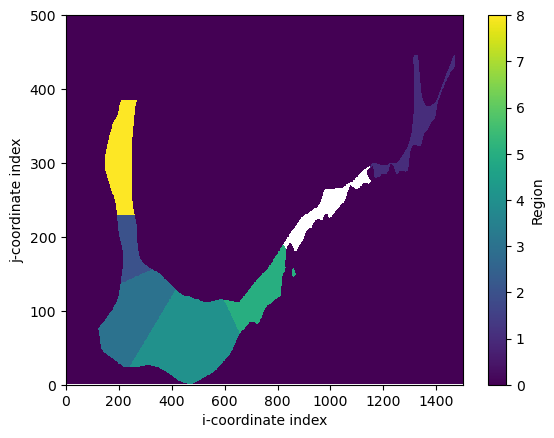

In [40]:
topo['Region'].where((topo['i_index']>1200)|(topo['j_index']>ytst)|(topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2)|(topo['Region']==3)|(topo['Region']==4)|(topo['Region']==5)).plot(xlim=(0,1500), ylim=(0,500));

In [41]:
topo['Region'] = topo['Region'].where((topo['i_index']>1200)|(topo['j_index']>ytst)|(topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2)|(topo['Region']==3)|(topo['Region']==4)|(topo['Region']==5), other=6)

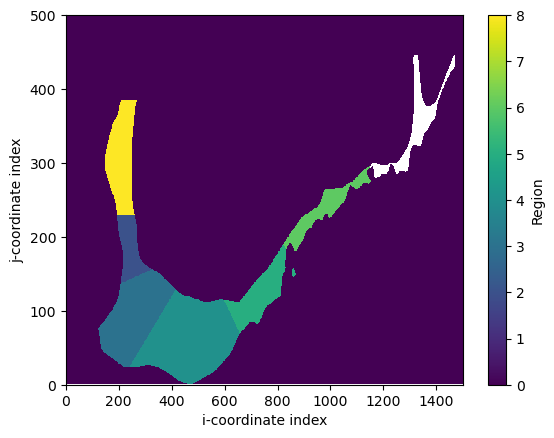

In [42]:
topo['Region'].where((topo['j_index']<ytst)|(topo['Region']==0)).plot(xlim=(0,1500), ylim=(0,500));

Check regions

In [43]:
topo['Region'] = topo['Region'].where((topo['j_index']<ytst)|(topo['Region']==0), other=7)

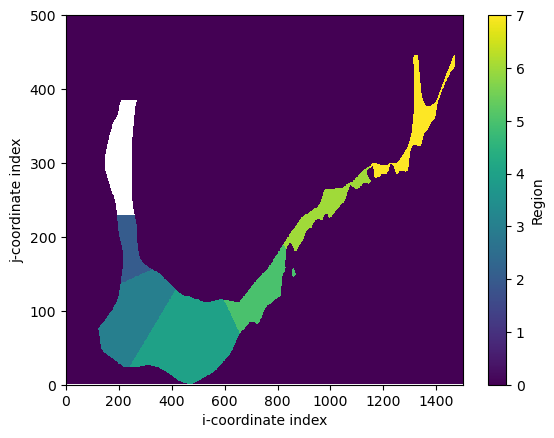

In [44]:
topo['Region'].where((topo['i_index']>400)|(topo['j_index']<230)|(topo['Region']==0)).plot(xlim=(0,1500), ylim=(0,500));

In [45]:
topo['Region'] = topo['Region'].where((topo['i_index']>400)|(topo['j_index']<230)|(topo['Region']==0), other=1)

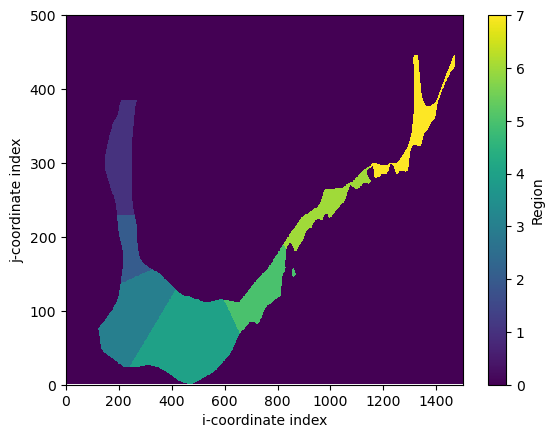

In [46]:
topo['Region'].plot(xlim=(0,1500), ylim=(0,500));

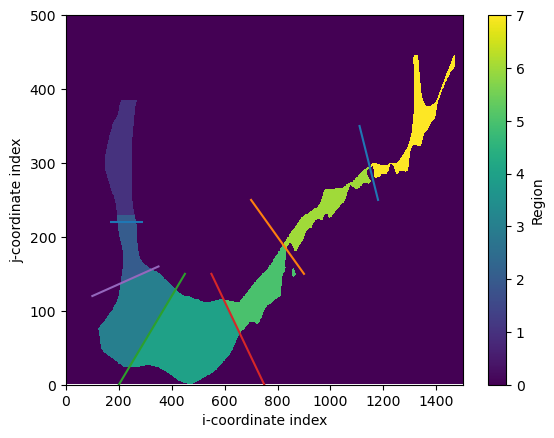

In [47]:
topo['Region'].plot(xlim=(0,1500), ylim=(0,500))
plt.hlines(220,165,290) # 1 - 2
# plt.vlines(1150,250,350) # 6a - 6b
plt.plot([1110,1180],[350,250])
plt.plot([700,900],[250,150]) # 5 - 6a
plt.plot([200,450],[0,150]) # 3 - 4
plt.plot([550,750],[150,0]) # 4 - 5
plt.plot([100,350],[120,160]); # 2 - 3

/nethome/5867800/.conda/envs/py3_parcels/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/nethome/5867800/.conda/envs/py3_parcels/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/nethome/5867800/.conda/envs/py3_parcels/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


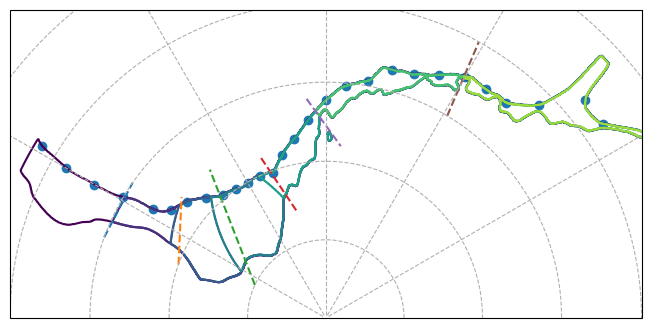

In [48]:
projection=ccrs.SouthPolarStereo()
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(10,4))
ax.set_extent([-90, 90, -85, -70], ccrs.PlateCarree())
ax.gridlines(linestyle='--')
    
ax.scatter(lonf, latf, transform=ccrs.PlateCarree())
ax.contour(topo['U_LON_2D'], topo['U_LAT_2D'], topo['Region'], transform=ccrs.PlateCarree())
ax.plot([-70,-55], [-75,-75], transform=ccrs.PlateCarree(), linestyle='--') # 1 - 2
ax.plot([-70,-50], [-80,-78], transform=ccrs.PlateCarree(), linestyle='--') # 2 - 3
ax.plot([-65,-38], [-85,-78], transform=ccrs.PlateCarree(), linestyle='--') # 3 - 4
ax.plot([-22,-15], [-79,-83], transform=ccrs.PlateCarree(), linestyle='--') # 4 - 5
ax.plot([-5,5], [-76,-79], transform=ccrs.PlateCarree(), linestyle='--') # 5 - 6a
ax.plot([31,29], [-75,-70], transform=ccrs.PlateCarree(), linestyle='--') # 6a - 6b
plt.show()

# Create new dataset

In [49]:
dataset = Dataset('bathymetry_regions.nc', 'w')

In [50]:
# Dimensions
i_indexs = dataset.createDimension('i_index', 3600)
j_indexs = dataset.createDimension('j_index', 2400+150)

In [51]:
# Variables
ins = dataset.createVariable('i_index', np.float32,('i_index',))
jns = dataset.createVariable('j_index', np.float32,('j_index',))
latitudes = dataset.createVariable('T_LAT_2D', np.float32,('j_index','i_index',))
longitudes = dataset.createVariable('T_LON_2D', np.float32,('j_index','i_index',))
latitudes2 = dataset.createVariable('U_LAT_2D', np.float32,('j_index','i_index',))
longitudes2 = dataset.createVariable('U_LON_2D', np.float32,('j_index','i_index',))
bathymetry = dataset.createVariable('bathymetry', np.float32,('j_index','i_index',))
regions = dataset.createVariable('region', np.int32,('j_index','i_index',))

In [52]:
# Write data
ins[:] = topo['i_index'][:]
jns[:] = topo['j_index'][:]
latitudes[:] = topo['T_LAT_2D'][:]
longitudes[:] = topo['T_LON_2D'][:]
latitudes2[:] = topo['U_LAT_2D'][:]
longitudes2[:] = topo['U_LON_2D'][:]
bathymetry[:] = topo['Bathymetry'][:]
regions[:] = topo['Region'][:]

In [53]:
# Attributes
latitudes.long_name = 'latitude on t-grid'
latitudes.units = 'degrees N'
longitudes.long_name = 'longitude on t-grid'
longitudes.units = 'degrees N'
latitudes2.long_name = 'latitude on u-grid'
latitudes2.units = 'degrees N'
longitudes2.long_name = 'longitude on u-grid'
longitudes2.units = 'degrees N'
ins.long_name = 'i-coordinate index'
jns.long_name = 'j-coordinate index'
regions.long_name = 'region index'

In [54]:
dataset.close()

## Test created file

In [55]:
regs = xr.open_dataset('/nethome/5867800/grid/bathymetry_regions.nc')

In [56]:
regs

<xarray.Dataset>
Dimensions:     (i_index: 3600, j_index: 2550)
Coordinates:
  * i_index     (i_index) float32 1.0 2.0 3.0 ... 3.598e+03 3.599e+03 3.6e+03
  * j_index     (j_index) float32 1.0 2.0 3.0 ... 2.548e+03 2.549e+03 2.55e+03
Data variables:
    T_LAT_2D    (j_index, i_index) float32 ...
    T_LON_2D    (j_index, i_index) float32 ...
    U_LAT_2D    (j_index, i_index) float32 ...
    U_LON_2D    (j_index, i_index) float32 ...
    bathymetry  (j_index, i_index) float32 ...
    region      (j_index, i_index) int32 ...

In [57]:
regs['region'].min(), regs['region'].max()

(<xarray.DataArray 'region' ()>
 array(0, dtype=int32),
 <xarray.DataArray 'region' ()>
 array(7, dtype=int32))

In [58]:
np.unique(regs['region'])

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

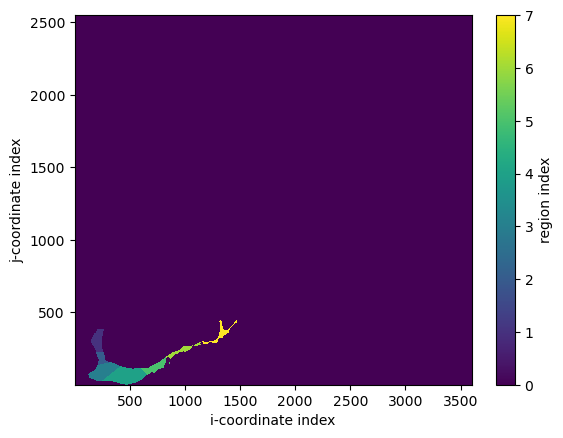

In [59]:
regs['region'].plot();

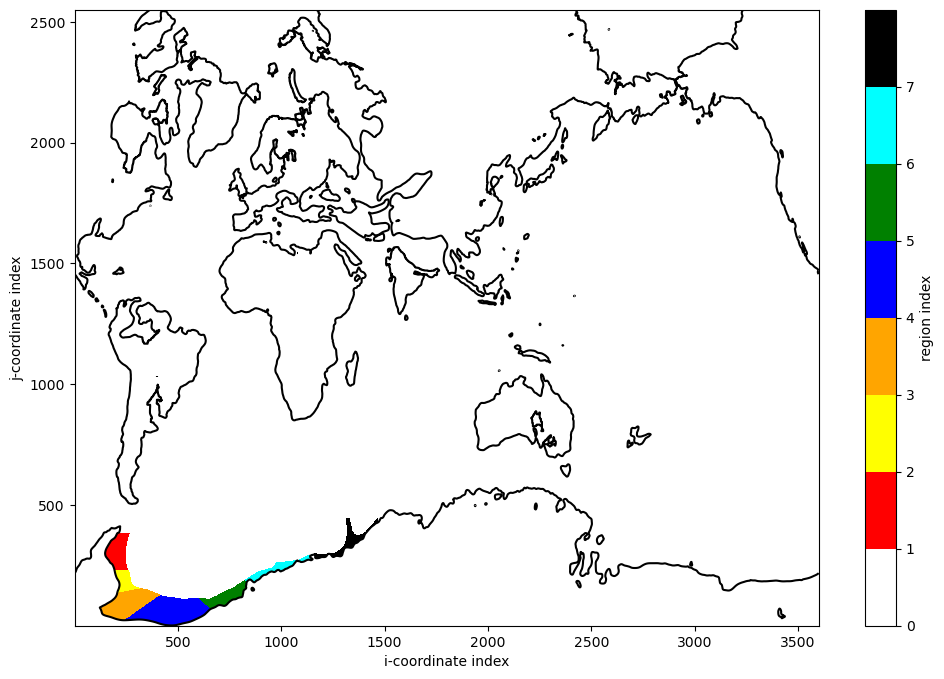

In [60]:
from matplotlib import colors
cmap = colors.ListedColormap(['white', 'red', 'yellow', 'orange', 'blue', 'green', 'cyan', 'black'])
bounds=[0.,1.,2.,3.,4.,5.,6.,7.,8.]
norm = colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_xlim(-80,70)
ax.set_ylim(-90,-60)

regs['region'].plot(ax=ax, cmap=cmap, norm=norm, cbar_kwargs={'ticks': [0, 1, 2, 3, 4, 5, 6, 7],
                                                              'spacing': 'proportional'})
regs['bathymetry'].plot.contour(ax=ax, levels=[0], colors='k')

plt.show();

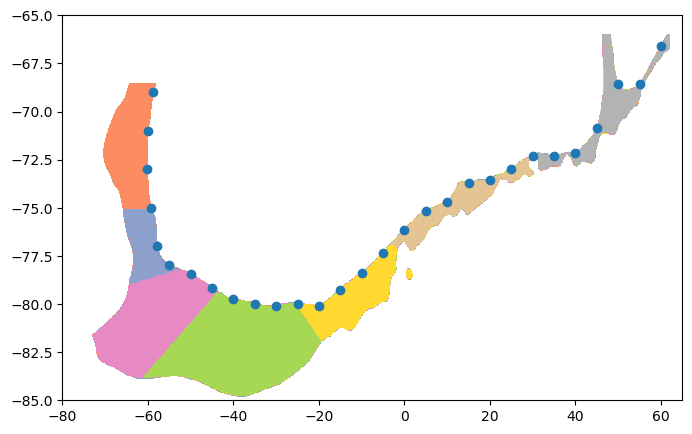

In [61]:
plt.figure(figsize=(8,5))
ax = plt.axes()

ax.scatter(lonf, latf, zorder=5)
ax.contourf(regs['U_LON_2D'].values, regs['U_LAT_2D'].values, regs['region'].values, levels=[-1,0,1,2,3,4,5,6,7], cmap='Set2')
ax.set_xlim(-80,65)
ax.set_ylim(-85,-65);